# 4 머신러닝(Machine Learning) 모델 적용

## 03 분류 모델 적용

#### 1 이진 분류 모델(로지스틱)

##### 가. 입력 변수가 1개(시험->합/부)

w= [[1.02741042]] b= [-74.30001409]


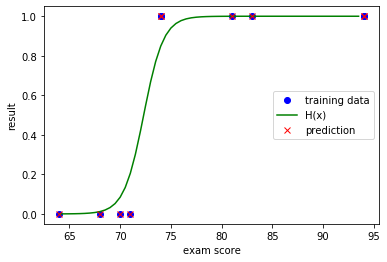

H(x)  =      [[0.41910132]
 [0.66839765]]
예측 결과 =  [0 1]


In [3]:
# 데이터: x(입력), y(정답)
import numpy as np               # 배열 연산 라이브러리
x = np.array([[74],[81],[94],[68],[64],[70],[83],[94],[71],[74]]) #시험점수
y = np.array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1])  # 1: 합격, 0: 불합격

# 모델 선정하기
from sklearn.linear_model import LogisticRegression  #로지스틱회귀 라이브러리
log_reg = LogisticRegression(solver='lbfgs')  # 모델 생성

# 학습하기
model = log_reg.fit(x, y)

# 학습 결과(w, b) 확인
w = model.coef_
b = model.intercept_
print("w=", w, "b=", b)

# 로지스틱 회귀 모델
def H(x):
  return 1/(1+np.exp(-(x*w+b)))

# 훈련데이터(x) 에 대한 모델의 예측
y_pred = np.where(H(x) > 0.5 , 1,0)  # 0.5보다 크면 1 아니면 0

# 모델 그래프 데이터 준비
x_in = np.arange(x.min(),x.max(),0.5)
Hx = H(x_in).reshape(-1,1)

# 그래프로 모델과 실제 데이터 비교하기
import matplotlib.pyplot as plt               # 데이터 시각화
plt.plot(x, y, 'bo', label='training data')       # 훈련 데이터셋
plt.plot(x_in, Hx, 'g', label='H(x)')         # H(x)
plt.plot(x, y_pred,'rx', label='prediction')  # 회귀모델의 예측
plt.xlabel("exam score"), plt.ylabel("result")
plt.legend(loc='right')
plt.show()

# 예측하기
x_new = np.array([[72],[73]])
print("H(x)  =     ", H(x_new))
print("예측 결과 = ", model.predict(x_new))      # 새로운 입력 데이터에 대한 출력 데이터 예측


In [31]:
print(np.shape(x), np.shape(w))

(10, 1) (1, 1)


##### 나. 입력 변수가 2개(시험,면접->합/부)

In [0]:
#배열 처리 및 수치 계산 라이브러리 numpy
import numpy as np     

#입력 데이터: 입력 특성 2개, 데이터셋 10개
X = np.array([[74, 68 ],  # 지원자1
     [81, 83 ],  # 지원자2
     [78, 80 ],  # 지원자3
     [80, 71 ],  # 지원자4
     [75, 75 ],  # 지원자5
     [70, 70 ],  # 지원자6
     [83, 77 ],  # 지원자7
     [74, 86 ],  # 지원자8
     [71, 76 ],  # 지원자9
     [74, 64 ]])  # 지원자10

y = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0]) # y(1)~y(10)

#feature_names = ['시험', '면접']
#target_name = '결과'

w= [[0.88565688 0.40926277]] b= [-98.2537524]
(10, 2) (10,)


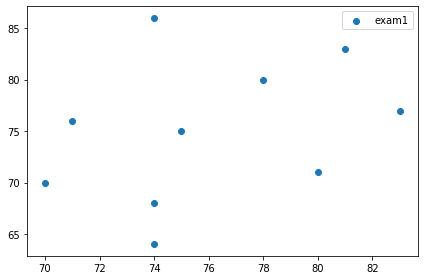

In [34]:
#라이브러리 
import numpy as np               # 연산
import matplotlib.pyplot as plt  # 데이터 시각화

# 모델 선정하기
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver='lbfgs')  # 추정기(로지스틱 회귀)

# 학습하기
model = log_reg.fit(X, y)

# 학습 결과(w, b) 확인
W = model.coef_
b = model.intercept_
print("w=", W, "b=", b)

def H(x):
  return 1/(1+np.exp(-(X*W+b)))

pred = np.where(H(X) > 0.5 , 1,0)
#x_in = np.arange(X.min(),X.max(),0.5)
#H = H(x_in)
#print(x_in.shape, H.shape)

# 그래프로 모델과 실제 데이터 비교하기
#plt.plot(X, y, 'bo', label='real data')      # 훈련 데이터셋
#plt.plot(x_in, H, 'g', label='H(x)')             # H(x)
#plt.plot(X, pred,'rx', label='prediction')   # 회귀모델의 예측
#plt.xlabel("exam score"), plt.ylabel("interview")
#plt.legend()
#plt.show()


print(np.shape(X), np.shape(y))
plt.scatter(X[:,0],X[:,1], marker='o', label = 'exam1')
#plt.scatter(X[:,1],y, marker='s', label = 'exam2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# 예측하기
x_new = np.array([[74, 80],[80, 74]])
#print(model.predict(x_new))      # 새로운 입력 데이터에 대한 출력 데이터 예측

### [참고] 이진 분류 모델(유방암)

#### 가 데이터 수집

 * 데이터명 : 위스콘신대학교 유방암 진단 데이터(Wisconsin Diagnostic Breast Cancer)
  * 캐글 https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
   * UCI https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
 * 레코드(열, 케이스, 인스턴스) 수: 569개
 * 속성(컬럼, 특성): 32개(ID, 진단결과, 30개의 실측값)
 * 클래스 분포 :  악성(Malignant) 212개, 양성(Benign) 357개

#### 나 전처리
* scikit-learn에서 제공하는 데이터셋을 이용
* 데이터 전처리가 거의 필요없는 데이터셋

In [0]:
from sklearn.datasets import load_breast_cancer  #데이터셋 가져오기
cancer = load_breast_cancer()   # 데이터셋 적재하기
print(cancer.DESCR)             # 데이터셋에 관한 설명
print(cancer.data)              # 입력 특성(feature)
print(cancer.target)            # 출력(label)
print(cancer.feature_names)     # 입력 특성의 이름
print(cancer.target_names)      # 출력의 이름

  * 참고: UCI 머신러닝저장소에서 데이터셋을 직접 가져오기

In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# 온라인에서 바로 데이터셋을 다운로드할 수 없으면
# 다음과 같이 로컬 경로에서 데이터셋을 적재한다.
# df = pd.read_csv('wdbc.data', header=None)

df.head()

0  1      2      3       4   ...      27      28      29      30       31
0    842302  M  17.99  10.38  122.80  ...  0.6656  0.7119  0.2654  0.4601  0.11890
1    842517  M  20.57  17.77  132.90  ...  0.1866  0.2416  0.1860  0.2750  0.08902
2  84300903  M  19.69  21.25  130.00  ...  0.4245  0.4504  0.2430  0.3613  0.08758
3  84348301  M  11.42  20.38   77.58  ...  0.8663  0.6869  0.2575  0.6638  0.17300
4  84358402  M  20.29  14.34  135.10  ...  0.2050  0.4000  0.1625  0.2364  0.07678

[5 rows x 32 columns]

 * 넘파이 데이터를 판다스 데이터프레임으로 변환(데이터셋을 쉽게 분석하기 위하여)

In [0]:
# 넘파이 데이터를 판다스 데이터프레임으로 변환하여 데이터셋 분석하기
import pandas as pd   # 행렬 계산 라이브러리
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)  # 데이터 객체 생성
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
print(cancer.data.shape())

TypeError: ignored

* 데이터 시각화를 통한 데이터 분석
  * 3차원 이상의 데이터셋은 seaborn 패키지의 pareplot으로 시각화한다.

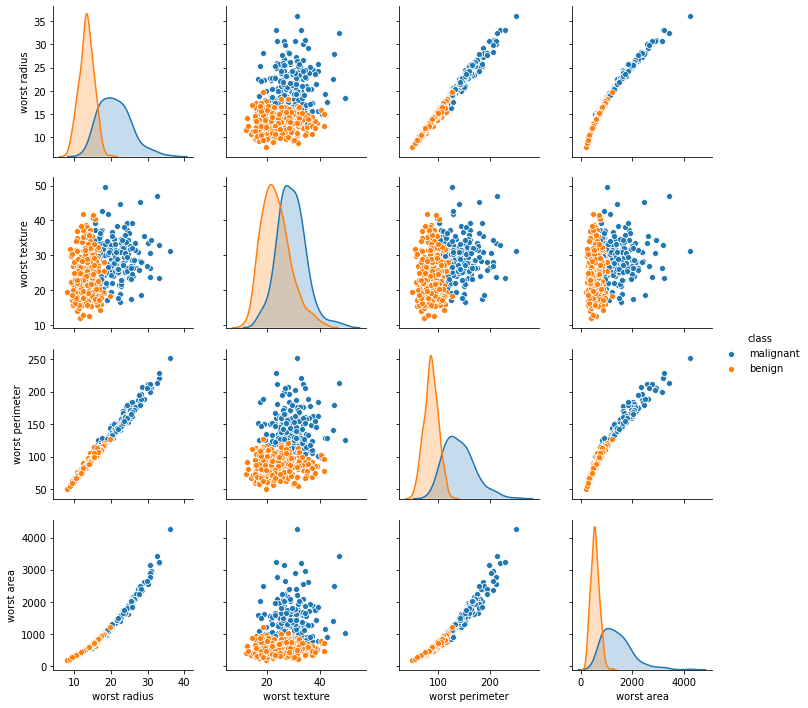

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], 
             hue="class", data=df)
plt.show()

 * [출처: 파이썬 라이브러리를 활용한 머신러닝](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/#linear-multi)

#### 다 학습하기

* 학습 준비

In [0]:
from sklearn.datasets import load_breast_cancer       # 유방암 데이터셋
from sklearn.linear_model import LogisticRegression   # 로지스틱 회귀 모델 라이브러리
from sklearn.model_selection import train_test_split  # 데이터셋 분리(훈련용/테스트용)
from sklearn.preprocessing import StandardScaler      # 특성 스케일링
from sklearn.pipeline import make_pipeline            # 파이프라인 만들기

# 유방암 데이터셋 불러오기
cancer = load_breast_cancer()

# 데이터셋 분리(훈련 80%, 테스트 20%)
X_train , X_test, y_train , y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# 파이프라인:순서(특성스케일링>로지스틱회귀)대로 변환기+추정기 수행하기
pipe_lr = make_pipeline(StandardScaler(),     # 변환기(특성 스케일링)
                        LogisticRegression(solver='lbfgs')) # 추정기(로지스틱 회귀)


* 학습하기

In [0]:
# 학습하기
model_lr = pipe_lr.fit(X_train, y_train)

# 모델의 정확도 출력
print("훈련 세트 정확도  : %.4f" %model_lr.score(X_train, y_train))

훈련 세트 정확도  : 0.9868


#### 라 모델 검증 및 성능 향상

* 계층적 k-fold 교차 검증(분류 모델에 주로 사용)

In [0]:
from sklearn.model_selection import cross_val_score  # 교차 검증 라이브러리
from sklearn.model_selection import StratifiedKFold  # 계층적 K폴드 교차 검증

# 모델 복잡도 제어 파라미터 조정(튜닝)
pipe_lr.set_params(logisticregression__C = 0.4 , logisticregression__max_iter=1000)
model_lr = pipe_lr.fit(X_train, y_train)

# 계층적 K폴드 교차 검증 – 폴드수:10
cv_val = StratifiedKFold(10, shuffle=True, random_state=42)
score = cross_val_score(model_lr, X_train, y_train, cv=cv_val)

# 결과 출력하기
for k in range(len(score)):
 print("단계", "%d : %.4f"%(k+1,score[k]))
print("평균: %.4f (표준편차=%.4f)" %(score.mean(),score.std()))

단계 1 : 1.0000
단계 2 : 1.0000
단계 3 : 0.9565
단계 4 : 0.9783
단계 5 : 0.9348
단계 6 : 0.9783
단계 7 : 1.0000
단계 8 : 0.9333
단계 9 : 1.0000
단계 10 : 0.9545
평균: 0.9736 (표준편차=0.0257)


 * [참고] k-fold 교차 검증(회귀 모델에 주로 사용)

In [0]:
from sklearn.model_selection import cross_val_score  # 교차 검증 라이브러리
from sklearn.model_selection import KFold            # K폴드 교차 검증

# K폴드 교차 검증
cv_val = KFold(10, shuffle=True, random_state=42)
score = cross_val_score(pipe_lr, X_train, y_train, cv=cv_val)

# 결과 출력하기
for k in range(len(score)):
 print("Fold ", "%d : %.4f"%(k+1,score[k]))
print("평균: %.4f (표준편차=%.4f)" %(score.mean(),score.std()))

* 모델 성능 향상을 위한 하이퍼파라미터 확인

In [0]:
# 제어할 수 있는 하이퍼파라미터 확인
print(pipe_lr.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])


* 훈련 데이터셋에서 검증 데이터셋 추출

In [0]:
# 훈련 데이터셋에서 검증용 데이터셋을 분리(훈련 80%, 검증 20%)
X_trainV , X_testV, y_trainV , y_testV = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

* 모델 성능 향상을 위한 C값 튜닝

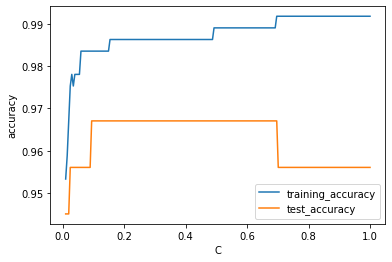

In [0]:
import numpy as np         # 행열 연산 라이브러리
import matplotlib.pyplot as plt

# 정확도 저장 변수
training_accuracy = []
test_accuracy = []

# 모델 복잡도 제어 계수
c_range = np.linspace(0.01,1,200)  # 0.01~100 에서 균일한 간격으로 200개

# C값 변화에 따른 모델 성능 검증 
for C_in in c_range:
    # 모델 복잡도 제어 파라미터 조정(튜닝)
    pipe_lr.set_params(logisticregression__C = C_in , 
                       logisticregression__max_iter=1000) 
    # 모델의 훈련 세트 정확도 저장
    result = pipe_lr.fit(X_trainV, y_trainV)      
    training_accuracy.append(result.score(X_trainV, y_trainV))
    # 모델의 일반화 정확도 저장
    test_accuracy.append(result.score(X_testV, y_testV))

# 결과 그래프 그리기
plt.plot(c_range, training_accuracy, label="training_accuracy")
plt.plot(c_range, test_accuracy, label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()
plt.show()

* 분류 성능 보고서
  * 1 : 암에 걸린 표본(양성, positive, benign), 
  * 0 : 암에 걸리지 않은 표본(음성, negative, malignant)
  * accuracy(정확도) : 전체 표본 중 정확하게 예측한 표본의 비율 = (TP+TN)/전체예측수
  * precision(정밀도): 양성(음성)이라고 예측한 표본 중 실제로 양성(음성)인 표본의 비율 = TP/(TP+FP)
  * recall(재현율)   : 실제로 양성(음성)인 표본 중 양성(음성)이라고 예측한 표본의 비율 = TP/(TP+FN)
  * f1-score(F점수)  : 정밀도와 재현율의 조화평균 = 2(precision*recall)/(precision+recall)
  * support          : 표본의 수
  * macro            : 단순 평균
  * weighted         : 각 클래스에 속하는 표본의 갯수로 가중평균

  * 오차 행렬(confusion matrix)
    * TP(True Positive)  : 양성을 양성이라고 정확하게 예측한 표본 수
    * TN(True Negative)  : 음성을 음성이라고 정확하게 예측한 표본 수
    * FP(False Positive) : 양성을 음성이라고 잘못 예측한 표본 수 
    * FN(False Negative) : 음성을 양성이라고 잘못 예측한 표본 수 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.96      0.98      0.97        55

    accuracy                           0.97        91
   macro avg       0.97      0.96      0.97        91
weighted avg       0.97      0.97      0.97        91



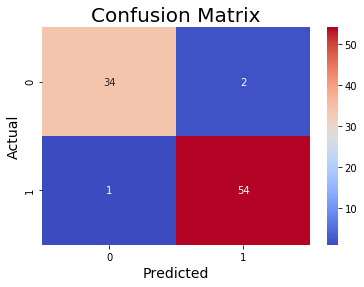

In [0]:
from sklearn.metrics import classification_report # 분류기 성능지표 라이브러리
from sklearn.metrics import confusion_matrix      # 오차행렬 라이브러리 

# 검증 모델 파라미터 설정
pipe_lr.set_params(logisticregression__C = 0.4 , logisticregression__max_iter=1000)

# 검증 모델 훈련
result = pipe_lr.fit(X_trainV, y_trainV)

# 분류기 성능지표 데이터 준비
y_true = y_testV                   # 실제값
y_pred = result.predict(X_testV)   # 예측값

# 분류 성능 보고서 확인
print(classification_report(y_true, y_pred))

# 그래프로 확인하기
cm = confusion_matrix(y_true,y_pred)    # 분류결과표 객체 생성
pic = sns.heatmap(cm, cmap="coolwarm", annot = True)  # 그래프 생성
bottom, top = pic.get_ylim()            # 숫자 잘림 현상 방지
pic.set_ylim(bottom + 0.5, top - 0.5)   # 숫자 잘림 현상 방지
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show(pic)                           # 그래프 보이기

  => c=0.4 로 교차 검증으로 다시 한 번 확인하고 최종 모델 결정

* 최종 모델

In [0]:
# 최종 모델 파이프라인
pipe_lr_final = make_pipeline(StandardScaler(),     # 변환기(특성 스케일링)
                LogisticRegression(solver='lbfgs',C = 0.4,max_iter=1000))  # 추정기(로지스틱 회귀)

# 학습된 최종 모델
model_final = pipe_lr_final.fit(X_train, y_train)

# 최종 모델 테스트
print("훈련 세트 점수  : %.4f" %model_final.score(X_train, y_train))
print("테스트 세트 점수: %.4f" %model_final.score(X_test, y_test))

훈련 세트 점수  : 0.9868
테스트 세트 점수: 0.9825


* 최종 모델 성능 확인

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



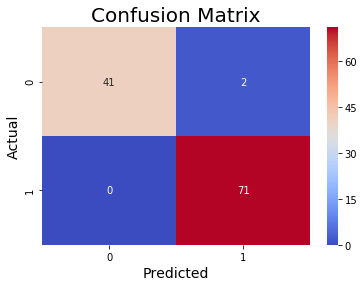

In [0]:
# 분류기 성능지표 데이터 준비
y_true = y_test                              # 실제값
y_pred = model_final.predict(X_test)         # 예측값

# 분류기 성능 출력하기
print(classification_report(y_true, y_pred))

# 오차행렬을 그래프로 출력하기
cm = confusion_matrix(y_true,y_pred)    # 분류결과표 객체 생성
pic = sns.heatmap(cm, cmap="coolwarm", annot = True)  # 그래프 생성
bottom, top = pic.get_ylim()            # 숫자 잘림 현상 방지
pic.set_ylim(bottom + 0.5, top - 0.5)   # 숫자 잘림 현상 방지
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show(pic)                           # 그래프 보이기

#### 마 예측하기

In [0]:
# model_final.predict(X_new)

### 2 다중 분류 모델(Iris, 소프트맥스)

[참고 사이트](https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983)

특성(x):
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스(y):
 ['setosa' 'versicolor' 'virginica']
데이터 수:
 x- (150, 4) y- (150,)
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]


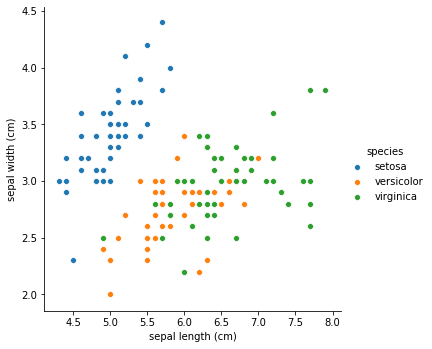

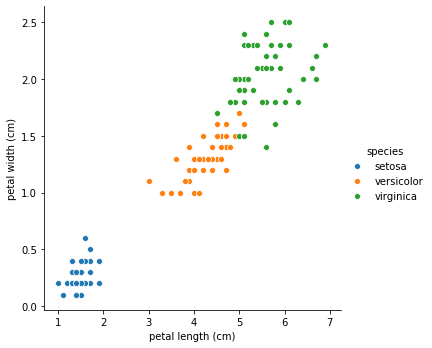

W= 
 [[-0.38  1.95 -3.98 -1.88]
 [ 0.93  0.07 -0.41 -1.88]
 [-0.56 -2.01  4.39  3.76]] 
b= 
 [ 12.93   2.37 -15.3 ]
(1) y = wx + b 
WX+b setosa     :  [[  6.06337357   4.5143735  -10.57774707]]
WX+b versicolor :  [[-4.23717262  3.52850238  0.70867024]]
WX+b virginica  :  [[-7.16943176  2.38663958  4.78279218]]
(2) 소프트맥스 추정 확률 s(y)
setosa    :  [[0.82 0.18 0.  ]]
versicolor:  [[0.   0.94 0.06]]
virginica :  [[0.   0.08 0.92]]
(3) One-hot-encoding 결과
입력: setosa     > 추정: [0]
입력: versicolor > 추정: [1]
입력: virginica  > 추정: [2]
정확도= 1.0000


In [7]:
# 데이터 가져오기
from  sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)                         # 데이터셋 설명
print("특성(x):\n", iris.feature_names)   # 특성 이름
print("클래스(y):\n", iris.target_names)  # 클래스 이름
x = iris.data                             # 데이터(x)
y = iris.target                           # 레이블(y)
print("데이터 수:\n x-", x.shape, "y-", y.shape) # 데이터 수

# 데이터 분석 - 표
import pandas as pd         # 데이터 분석 라이브러리
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
print(df.head())
# 데이터 분석 - 그래프
import matplotlib.pyplot as plt    # 그래프 라이브러리
import seaborn as sns              # matplot를 확장한 그래프 라이브러리
sns.pairplot(df, x_vars=["sepal length (cm)"], 
             y_vars=["sepal width (cm)"], hue="species", height = 5)
sns.pairplot(df, x_vars=["petal length (cm)"], 
             y_vars=["petal width (cm)"], hue="species", height = 5)
plt.show()

# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x, y, 
                                test_size = 0.3, random_state = 42)

# 모델 선정
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', C=10, 
           solver='lbfgs', max_iter=1000, random_state = 42)

# 훈련
model.fit(x_train,y_train)

# 훈련 결과
import numpy as np          # 수학 연산 라이브러리
W = model.coef_
b = model.intercept_
print("W= \n", np.round(W,2), "\nb= \n", np.round(b,2))

# 분류 과정을 살펴보기 위한 클래스별 데이터 만들기
x_set = [[5.0, 2.5, 2.0, 1.0]]  # setosa
x_ver = [[6.0, 3.0, 4.5, 1.5]]  # versicolor
x_vir = [[6.0, 3.0, 5.0, 2.0]]  # virginica

# 로지스틱 회귀 모델
def H(X):
  Hx = np.matmul(X,W.T)+b  # Hx = WX + b
  return 1/(1+np.exp(-Hx))

# (1) wx + b 출력 
print("(1) y = wx + b ")
print("WX+b setosa     : ",np.matmul(x_set,W.T)+b )
print("WX+b versicolor : ",np.matmul(x_ver,W.T)+b )
print("WX+b virginica  : ",np.matmul(x_vir,W.T)+b )

# (2) 소프트맥스 추정 확률
print("(2) 소프트맥스 추정 확률 s(y)")
print("setosa    : ", np.round(model.predict_proba(x_set),2))
print("versicolor: ", np.round(model.predict_proba(x_ver),2))
print("virginica : ", np.round(model.predict_proba(x_vir),2))

# (3) One-hot-encoding 결과 
print("(3) One-hot-encoding 결과")
print("입력: setosa     > 추정:", model.predict(x_set))
print("입력: versicolor > 추정:", model.predict(x_ver))
print("입력: virginica  > 추정:", model.predict(x_vir))

# 모델 테스트
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print("정확도= %.4f" %accuracy_score(y_test, y_pred))

<Figure size 2880x2880 with 0 Axes>

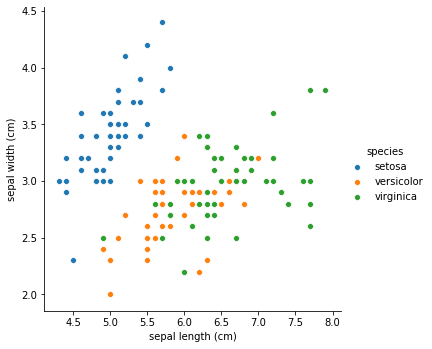

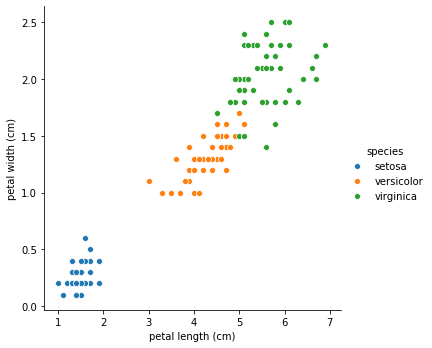

In [5]:
# 데이터 분석 - 그래프
import matplotlib.pyplot as plt    # 그래프 라이브러리
import seaborn as sns              # matplot를 확장한 그래프 라이브러리
sns.pairplot(df, x_vars=["sepal length (cm)"], 
             y_vars=["sepal width (cm)"], hue="species", height = 5)
sns.pairplot(df, x_vars=["petal length (cm)"], 
             y_vars=["petal width (cm)"], hue="species", height = 5)
plt.show()

##### [참고] 결정 경계 그래프
[참고 사이트](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

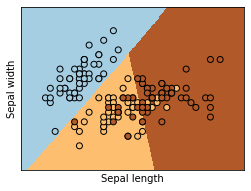

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

##### [참고] 3종의 분류기 비교

In [109]:
from  sklearn import  datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 42)

from sklearn import tree
dtree_clf = tree.DecisionTreeClassifier()
dtree_clf.fit(x_train,y_train)
#y_pred = dtree_clf.predict(x_test)

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
sgd_clf = SGDClassifier(max_iter=1000, random_state= 42)
rndf_clf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state = 42)
smax_clf = LogisticRegression(multi_class='multinomial', 
                                 solver='lbfgs', C=10, max_iter=1000, random_state = 42)

sgd_clf.fit(x_train,y_train)
rndf_clf.fit(x_train,y_train)
smax_clf.fit(x_train,y_train)


from sklearn.metrics import accuracy_score
print("DecisionTree 정확도", accuracy_score(y_test,dtree_clf.predict(x_test)))
print("SGDClassifier 정확도", accuracy_score(y_test,sgd_clf.predict(x_test)))
print("RandomForest 정확도", accuracy_score(y_test,rndf_clf.predict(x_test)))
print("SoftMax 정확도", accuracy_score(y_test,smax_clf.predict(x_test)))


DecisionTree 정확도 1.0
SGDClassifier 정확도 0.8
RandomForest 정확도 1.0
SoftMax 정확도 1.0


### [참고] 다중 분류 모델(MNIST)

#### 실습 기본 환경 설정

In [0]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 라이브러리
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.model_selection import train_test_split

# 일관된 출력을 위해 난수 시드 설정
np.random.seed(42)

#### 가 데이터 수집
 * [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)
 * [캐글 ](https://www.kaggle.com/c/digit-recognizer/data)


In [0]:
# 참고: sklearn에서 가져오기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print(mnist.DESCR)

In [0]:
# 참고: 텐서플로에서 가져오기
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('../data', one_hot=True)

In [0]:
# 데이터 가져오기
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


#### 나 전처리

In [0]:
# 분류기 입력에 맞도록 차원 조정
X_train_rs = X_train.reshape(X_train_val.shape[0], 784)
X_test_rs = X_train.reshape(X_test_val.shape[0], 784)

# 특성 스케일링
X_train = X_train_rs.astype('float64') / 255.
X_test = X_test_rs.astype('float64') / 255.

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [1]:
# 이미지 하나 꺼내서 보기
some_digit = X_train_rs[30000]
plt.imshow(some_digit.reshape(28,28), cmap = matplotlib.cm.binary,
           interpolation="nearest")

plt.axis("off")
plt.show()
y_train[30000]
print(some_digit)

for i in X_train[0]:
    for i in i:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')

NameError: ignored

#### 다 모델 적용


##### (1) SGD 모델

* 이진 분류

In [0]:
# 숫자 3 훈련 데이터셋 준비
y_train_3 = (y_train == 3)  # 3은 true, 다는 숫자는 false

In [0]:
# 모델 생성
sgd_clf = SGDClassifier(max_iter=100, random_state= 42)
# 훈련(클래스가 '3'인 것만)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# 예측
sgd_clf.predict([some_digit])  # some_digit가 숫자 3인지 아닌지 이진 분류

array([ True])

In [0]:
# SGD 이진 분류기의 정확도 (3-fold 교차 검증)
cross_val_score(sgd_clf, X_train, y_train_3, 
                cv=3, scoring="accuracy")

array([0.97430128, 0.97365   , 0.97554878])

* 다중 분류(SGD)

In [0]:
# 훈련(모든 클래스)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# 예측
sgd_clf.predict([some_digit])  # some_digit가 숫자 클래스 0~9 중 어디에 속하는지 다중 분류

array([3], dtype=uint8)

In [0]:
# 클래스별 점수
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -7.78467151,  -4.10920898,  -4.3992786 ,   1.42534622,
         -8.59998633,  -2.64105064, -10.06681829,  -4.94602509,
         -3.58204814,  -4.78974784]])

In [0]:
# SGD 다중 분류기의 정확도 (3-fold 교차 검증)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.91106779, 0.90519526, 0.90883633])

In [0]:
# 오차행렬(행: 실제값, 열: 예측값) 
y_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[5691,    2,   31,   18,   16,   49,   42,   18,   50,    6],
       [   1, 6584,   32,   15,    8,   37,    8,   14,   38,    5],
       [  40,   94, 5221,  132,   87,   38,   52,   83,  190,   21],
       [  15,   37,  136, 5365,   14,  259,   36,   65,  143,   61],
       [  12,   27,   33,    5, 5477,   16,   37,   20,   59,  156],
       [  44,   29,   40,  187,   80, 4701,  121,   28,  135,   56],
       [  33,   27,   41,    3,   45,  118, 5610,    6,   33,    2],
       [  16,   33,   62,   18,   76,   15,    4, 5892,   21,  128],
       [  33,  187,   68,  158,   67,  235,   50,   37, 4940,   76],
       [  32,   44,   22,  107,  294,   78,    2,  263,   86, 5021]])

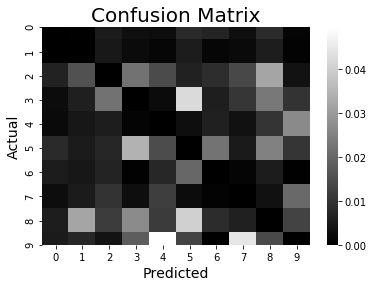

In [0]:
# 오차행렬을 그래프로 출력하기
row_sums = conf_mx.sum(axis=1, keepdims=True) # 클래스 합계
norm_conf_mx = conf_mx / row_sums  # 정규화(클래스 테이터 수 불일치 감안)
np.fill_diagonal(norm_conf_mx, 0)  # 대각선 비우기

pic = sns.heatmap(norm_conf_mx, cmap="gray")  # 그래프 생성

plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show(pic)                           # 그래프 보이기

##### (2) 랜덤포레스트 모델

In [0]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=10,
                             random_state=42)

In [0]:
# 훈련
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# 예측
forest_clf.predict([some_digit])

array([3], dtype=uint8)

In [0]:
# 클래스별 추정 확률
forest_clf.predict_proba([some_digit])

array([[0.00368858, 0.01148363, 0.02004596, 0.84440923, 0.00405194,
        0.05421412, 0.00474754, 0.02289355, 0.02351945, 0.010946  ]])

In [0]:
# 랜덤포레스트 분류기의 정확도 (3-fold 교차 검증)
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94541092, 0.94069703, 0.94624194])

In [0]:
# 오차행렬(행: 실제값, 열: 예측값) 
y_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[5799,    1,   10,    3,    7,    8,   23,    1,   67,    4],
       [   1, 6594,   47,   19,   13,   12,    8,   14,   23,   11],
       [  31,   18, 5603,   44,   54,    4,   44,   75,   62,   23],
       [  11,   29,  115, 5641,   12,  102,   15,   64,   85,   57],
       [  12,   11,   16,    2, 5470,    2,   36,   18,   32,  243],
       [  33,   41,   12,  105,   17, 5036,   63,    9,   53,   52],
       [  29,   23,    3,    1,   21,   55, 5750,    2,   34,    0],
       [   9,   41,   86,   10,   55,    1,    0, 5874,   21,  168],
       [  13,   73,   39,   77,   37,   44,   31,   10, 5383,  144],
       [  23,   22,   23,   96,  110,   17,    8,   96,   57, 5497]])

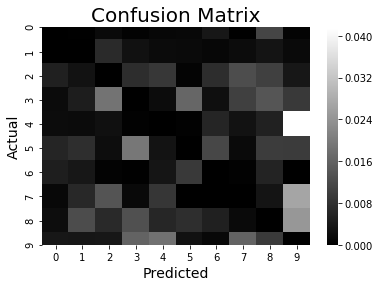

In [0]:
# 오차행렬을 그래프로 출력하기
row_sums = conf_mx.sum(axis=1, keepdims=True) # 클래스 합계
norm_conf_mx = conf_mx / row_sums  # 정규화(클래스 테이터 수 불일치 감안)
np.fill_diagonal(norm_conf_mx, 0)  # 대각선 비우기

pic = sns.heatmap(norm_conf_mx, cmap="gray")  # 그래프 생성

plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show(pic)                           # 그래프 보이기

##### (3) 소프트맥스 모델

In [0]:
# 모델 생성
softmax_clf = LogisticRegression(multi_class='multinomial', 
                                 solver='lbfgs', C=10,max_iter=100)

In [0]:
# 학습
softmax_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# 예측
softmax_clf.predict([some_digit])

array([3], dtype=uint8)

In [0]:
# 클래스별 추정 확률
softmax_clf.predict_proba([some_digit])


array([[3.02399593e-07, 3.55384662e-05, 1.12718577e-04, 9.93759403e-01,
        1.21316400e-07, 8.98950904e-04, 3.84016072e-09, 7.82824851e-04,
        3.62036997e-03, 7.89766503e-04]])

In [0]:
# 소프트맥스 분류기의 정확도 (3-fold 교차 검증)
cross_val_score(softmax_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0.91536693, 0.91669583, 0.91923789])

In [0]:
# 오차행렬(행: 실제값, 열: 예측값) 
y_pred = cross_val_predict(softmax_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[5681,    1,   31,   10,   14,   64,   49,   16,   47,   10],
       [   1, 6555,   28,   24,    9,   31,    6,   16,   61,   11],
       [  35,   75, 5307,  110,   68,   29,   88,   75,  141,   30],
       [  21,   29,  142, 5462,    7,  220,   19,   54,  116,   61],
       [  17,   21,   32,   11, 5416,    9,   64,   25,   42,  205],
       [  63,   18,   59,  175,   59, 4720,  103,   24,  143,   57],
       [  41,   14,   61,    2,   54,   78, 5624,    6,   33,    5],
       [  10,   25,   67,   31,   56,   13,    2, 5841,   20,  200],
       [  38,  126,   74,  169,   43,  176,   51,   21, 5070,   83],
       [  28,   29,   14,   83,  156,   42,    3,  192,   52, 5350]])

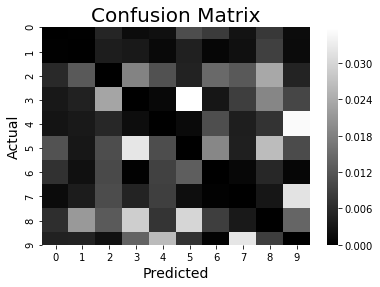

In [0]:
# 오차행렬을 그래프로 출력하기
row_sums = conf_mx.sum(axis=1, keepdims=True) # 클래스 합계
norm_conf_mx = conf_mx / row_sums  # 정규화(클래스 테이터 수 불일치 감안)
np.fill_diagonal(norm_conf_mx, 0)  # 대각선 비우기

pic = sns.heatmap(norm_conf_mx, cmap="gray")  # 그래프 생성

plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show(pic)                           # 그래프 보이기

[참고] 앙상블

In [0]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('sg', sgd_clf), ('fr', forest_clf), ('sf', softmax_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('sg',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=100,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=42, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, wa...
                                                     random_state=42, verbose=0,
                              

In [0]:
from sklearn.metrics import accuracy_score

for clf in (sgd_clf, forest_clf, softmax_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SGDClassifier 0.9174
RandomForestClassifier 0.9486


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression 0.9254


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier 0.9328


#### 바 모델 활용하기
여러분이 손으로 그린 숫자를 얼마나 잘 인식하는지 테스트 해보자

* 손글씨 이미지 변환
[참고 사이트](https://twinw.tistory.com/252)

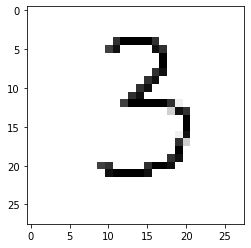

sgd     [0 3 0 5 6 5 4 2 8 3 5 3 7 5 4 7 9 3 5 2] 70.0%
forest  [0 3 0 5 6 5 7 2 3 1 5 3 7 5 4 7 7 4 5 7] 50.0%
softmax [0 3 0 5 6 5 4 2 8 7 5 3 7 5 4 7 9 7 5 2] 75.0%
y_label [0 3 0 6 6 5 4 2 8 7 1 3 7 5 4 1 9 9 8 2]
입력파일   정답 -  sg  fr  sf
0a.png       0  -   0   0   0
3a.png       3  -   3   3   3
0b.png       0  -   0   0   0
6b.png       6  -   5   5   5
6a.png       6  -   6   6   6
5a.png       5  -   5   5   5
4a.png       4  -   4   7   4
2a.png       2  -   2   2   2
8b.png       8  -   8   3   8
7a.png       7  -   3   1   7
1a.png       1  -   5   5   5
3b.png       3  -   3   3   3
7b.png       7  -   7   7   7
5b.png       5  -   5   5   5
4b.png       4  -   4   4   4
1b.png       1  -   7   7   7
9b.png       9  -   9   7   9
9a.png       9  -   3   4   7
8a.png       8  -   5   5   5
2b.png       2  -   2   7   2


In [0]:
import os, re, glob, cv2
import numpy as np
import shutil
 
def Dataization(img_path):
    image_w = 28
    image_h = 28
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=image_w/img.shape[1], 
                     fy=image_h/img.shape[0])
    return (img)
 
src = [] ; name = [] ; test = []

image_dir = "/content/test/"
for file in os.listdir(image_dir):
    if (file.find('.png') is not -1):      
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization(image_dir + file))
 
# 분류기 입력 형식으로 변환
test_ary = np.array(test)     # 리스트를 넘파이 배열로 변환
test_img = test_ary[:,:,:,0]  # test의 마지막 차원 제거
test_val = test_img.reshape(test_img.shape[0],28*28) # x,y 차원 축소

# 이미지 하나 꺼내서 보기
some_digit = test_img[1]  # 두번째 파일
plt.imshow(some_digit, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.show()

# 테스트 데이터 스케일링
test_val = test_val.astype('float64') / 255.

# 실제값(정답) 만들기
first_fname = []
for i in range(len(test_val)):
  first_fname.append(name[i][0])          # 파일명의 첫 글자가 정답
y_label = np.array(first_fname).astype(np.uint8)  # 문자를 숫자로 변환

# 예측하기 : sgd_clf, forest_clf, softmax_clf
y_pred1 = sgd_clf.predict(test_val)
y_pred2 = forest_clf.predict(test_val)
y_pred3 = softmax_clf.predict(test_val)

# 정확도 계산
score1 = np.array(y_pred1 == y_label).sum()/len(y_label)*100
score2 = np.array(y_pred2 == y_label).sum()/len(y_label)*100
score3 = np.array(y_pred3 == y_label).sum()/len(y_label)*100

# 결과 출력
print("sgd    ", y_pred1, "%.1f%%" %score1) 
print("forest ", y_pred2, "%.1f%%" %score2)
print("softmax", y_pred3, "%.1f%%" %score3)
print("y_label", y_label)

print("입력파일   정답 -  sg  fr  sf")      
for i in range(len(test_val)):
    print("%-10s %3d  - %3d %3d %3d"
          %(name[i], y_label[i], y_pred1[i], y_pred2[i], y_pred3[i]))


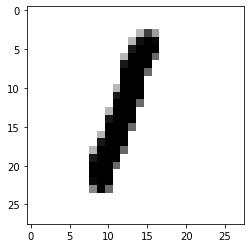

1_1.png [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.28235294 0.74901961 0.3

In [0]:
# 이미지 하나 꺼내서 보기
idx = 1

some_digit = test_img[idx]
plt.imshow(some_digit, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.show()

print(name[idx], test_val[idx][0:280])

In [0]:
# test 폴더에서 확장자기 .png인 모든 파일 삭제하기
!rm ./test/*.png
!ls ./test/

In [0]:
# 모델 저장하기
import pickle
# estimators=[('sg', sgd_clf), ('fr', forest_clf), ('sf', softmax_clf)],
filename = "softmax_clf.sav"

pickle.dump(softmax_clf,open(filename,'wb'))
# 파일은 colab 런타임에 저장된다. 왼쪽 화면에서 [파일]메뉴를 누르면 확인할 수있다.
# colab에서는 런타임을 다시 시작하면 파일이 지워지니 본인의 PC에 파일을 내려받아서 저장한다.